In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import yaml
from scipy.interpolate import interp2d,RectBivariateSpline
from numpy import *

from matplotlib.pyplot import *


In [3]:
import yaml
import numpy as np

import luxeics

In [4]:
# input_filename = 'pencil_beam'
input_filename = 'small_beam'

with open( input_filename + '.yml', 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

print (input_dict)

{'control': {'sampling': 'rejection', 'xsection': 'Greiner', 'beam': {'sample_electrons': '1e8', 'sample_batch_size': '1e7'}, 'laser': {'sigma_rescale': False, 'sigma_crit': 50.0}}, 'beam': {'gamma': 32289.62818003914, 'energyspread': '1e-3', 'emittanceX': 1.5, 'emittanceY': 1.5, 'sigmaX': 5.0, 'sigmaY': 5.0, 'sigmaL': 20.0, 'beam_charge': '100e-12', 'beam_focus_z': 0, 'baseline': '7.5e6'}, 'laser': {'a0': 0.1, 'omega0': 4.1, 'Tpulse': 100.0, 'pol': 0, 'pulse': 'cos2', 'w0': 25.0, 'S3': 1.0}, 'detector': {'pdim': 3, 'omega': ['5.0e9', '9.2e9'], 'theta': [0, '15e-6'], 'phi': [0.0, 6.283185307179586]}}


In [5]:
SIM = luxeics.ICSSimulation( input_filename )
SIM.run()

print (dir(SIM))

n_batches=10, remainder=0, number_of_particles=1e+08=1e+08
 >> number_electrons   = 624150947
 >> sample_electrons   = 100000000
 >> electron weight    = 6.242
0 10000000
  > batch 000: 1e+07 macroelectrons of weight 6.2415
   base photon weight : 7.337013351518631
   number photons     : 14365
[1.16416928 1.25270256 1.25625629 ... 1.15938374 1.1174835  1.21718521]
[1.16416928 1.25270256 1.25625629 ... 1.15938374 1.11748349 1.21718521]
   total photon number: 14365 14365
1 10000000
  > batch 001: 1e+07 macroelectrons of weight 6.2415
   base photon weight : 7.344418118573016
   number photons     : 14508
[1.16513016 1.21201622 1.17094811 ... 1.01173267 0.83513636 1.10202362]
[1.16513017 1.21201621 1.17094811 ... 1.0117327  0.83513636 1.10202361]
   total photon number: 28873 28873
2 10000000
  > batch 002: 1e+07 macroelectrons of weight 6.2415
   base photon weight : 7.171974083239414
   number photons     : 14790
[1.18989031 1.26263701 1.16832134 ... 0.61135052 0.95475826 0.96118002]


In [6]:
# input_filename = 'small_beam_full'

with h5py.File(input_filename + '.h5' ,'r') as ff:
#     omega      = ff['final-state/spectrum/omega'][:]/1e9
#     theta      = ff['final-state/spectrum/theta'][:]*1e6
#     spectrum   = ff['final-state/spectrum/spectrum'][:]

    K0,K1,K2,K3       = ff['final-state/photon/momentum'][:].T
    X0,X1,X2,X3       = ff['final-state/photon/position'][:].T
    W                 = ff['final-state/photon/weight'  ][:]
    Stokes1,_,Stokes3 = ff['final-state/photon/Stokes'  ][:].T

    P0,P1,P2,P3  = ff['final-state/electron/momentum'][:].T
#     X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
#     We            = ff['final-state/photon/weight'  ][:]


In [7]:
with open( input_filename + '.yml', 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)
    
#     mode             = input_dict['control']['mode']
    
    
    beam_charge      = float( input_dict['beam']['beam_charge'])
    number_electrons = int( beam_charge / 1.60217653e-19)

    sampling         = input_dict['control']['sampling']
#     sampling = mode
    
    w0               = float(input_dict['laser']['w0'])


In [8]:
print (f'beam charge                              : {beam_charge*1e12:.24} pC')
print (f'number of beam electrons                 : {number_electrons:.4e}')
print ('-'*42)
print (f'{sampling} sampling:')
print (f'max  single photon weight                : {amax(W):.4g}')
print (f'mean single photon weight                : {mean(W):.4g}')
print (f'total photon weight                      : {sum(W):.4g}')
print (f'total photon weight per incident electron: {sum(W)/number_electrons:.4g}')
print (f'total macro photon number                : {len(W)}')
print ('-'*42)


beam charge                              : 100.0 pC
number of beam electrons                 : 6.2415e+08
------------------------------------------
rejection sampling:
max  single photon weight                : 7.543
mean single photon weight                : 7.31
total photon weight                      : 1.063e+06
total photon weight per incident electron: 0.001703
total macro photon number                : 145421
------------------------------------------


In [9]:
# beam charge                              : 100.0 pC
# number of beam electrons                 : 6.2415e+08
# ------------------------------------------
# mode: full
# rejection sampling:
# max  single photon weight                : 17.07
# mean single photon weight                : 17.07
# total photon weight                      : 2.459e+06
# total photon weight per incident electron: 0.00394
# total macro photon number                : 144065
# ------------------------------------------
# mode: simple
# rejection sampling:
# max  single photon weight                : 7.483
# mean single photon weight                : 7.483
# total photon weight                      : 2.475e+06
# total photon weight per incident electron: 0.003965
# total macro photon number                : 330724
# ------------------------------------------

In [10]:
# figure(figsize=(10,6))
# pcolormesh(omega.ravel(),theta.ravel(),spectrum.T,rasterized=True,cmap=cm.magma)
# xlim(6,9)
# ylim(0,15)
# colorbar(label='spectrum')

# xlabel(r'$\omega$ (GeV)')
# ylabel(r'$\theta$ ($\mu$rad)')

# savefig('spectrum.pdf')

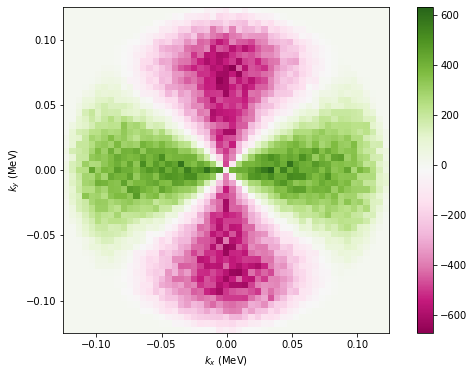

In [11]:
figure(figsize=(10,6))

subplot(111,aspect=1)
hist2d(K1/1e6,K2/1e6,bins=(51,51),weights=W*Stokes3,rasterized=True,cmap=cm.PiYG);
colorbar()

xlabel(r'$k_x$ (MeV)')
ylabel(r'$k_y$ (MeV)')


savefig(f'photon_transverse_momentum_Stokes3_{input_filename}.pdf')


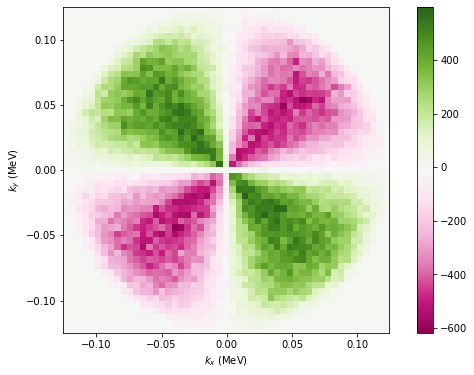

In [12]:
figure(figsize=(10,6))

subplot(111,aspect=1)
hist2d(K1/1e6,K2/1e6,bins=(51,51),weights=W*Stokes1,rasterized=True,cmap=cm.PiYG);
colorbar()

xlabel(r'$k_x$ (MeV)')
ylabel(r'$k_y$ (MeV)')


savefig(f'photon_transverse_momentum_Stokes1_{input_filename}.pdf')


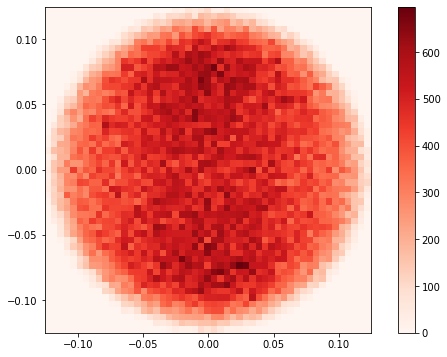

In [36]:
phi =  arctan2(K2,K1)


Stokes_rot3 = cos(2*phi) * Stokes3 - sin(2*phi) * Stokes1
Stokes_rot1 = sin(2*phi) * Stokes3 + cos(2*phi) * Stokes1


figure(figsize=(10,6))

subplot(111,aspect=1)

hist2d(K1/1e6,K2/1e6,bins=(51,51),weights=W*Stokes_rot3,rasterized=True,cmap=cm.Reds);
colorbar()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


3.139248576978412 -3.133218445277468


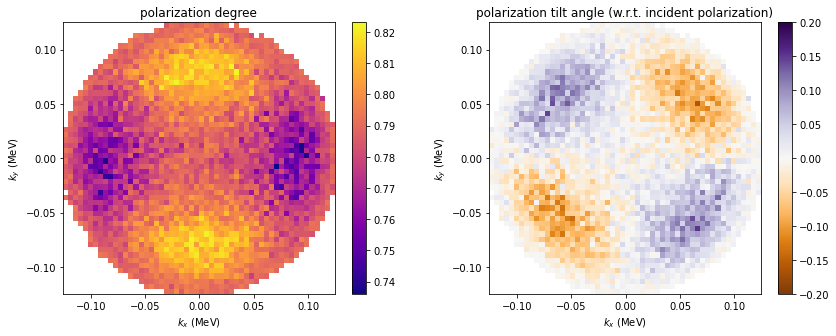

In [41]:
PolDegree = np.sqrt(Stokes1**2 + Stokes3**2 )

n         = K1 < 0

TiltAngle     = 0.5*np.arctan2(Stokes1,Stokes3) -  n *pi
TiltAngle_rot = 0.5*np.arctan2(Stokes_rot1,Stokes_rot3) #-  n *pi

phi =  arctan2(K2,K1)

# figure(figsize=(10,6))

bbins = (54,52)

# subplot(111,aspect=1)
values_w_s, xedge, yedge = histogram2d(K1/1e6,K2/1e6,bins=bbins,weights=W*PolDegree )
values_w  , xedge, yedge = histogram2d(K1/1e6,K2/1e6,bins=bbins,weights=W           )
values_w_tilt, xedge, yedge = histogram2d(K1/1e6,K2/1e6,bins=bbins,weights=W*TiltAngle_rot )
values_w_phi , xedge, yedge = histogram2d(K1/1e6,K2/1e6,bins=bbins,weights=W*phi )

# print (histogram2d(K1/1e6,K2/1e6,bins=(51,51),weights=W*PolDegree))

fig,ax = subplots(1,2,figsize=(14,5))
p=ax[0].pcolormesh( xedge, yedge, (values_w_s / values_w).T ,rasterized=True,cmap=cm.plasma);
colorbar(p,ax=ax[0])


tilt_angle_in_lab_rot = values_w_tilt / values_w

tilt_angle_in_lab = (values_w_tilt + values_w_phi) / values_w

renormalized_tilt_angle0  = nan_to_num(tilt_angle_in_lab )

renormalized_tilt_angle = (( renormalized_tilt_angle0 + pi )%(2*pi) -pi)

print (amax(renormalized_tilt_angle),amin(renormalized_tilt_angle))

p=ax[1].pcolormesh( xedge, yedge, tilt_angle_in_lab_rot.T ,rasterized=True,cmap=cm.PuOr, vmin=-0.2,vmax=0.2);
# p=ax[1].pcolormesh( xedge, yedge, renormalized_tilt_angle.T ,rasterized=True,cmap=cm.PuOr, vmin=-0.2,vmax=0.2);
colorbar(p,ax=ax[1])


for axj in ax:
    axj.set_aspect(1)
    axj.set_xlabel(r'$k_x$ (MeV)')
    axj.set_ylabel(r'$k_y$ (MeV)')

ax[0].set_title(r'polarization degree')
ax[1].set_title(r'polarization tilt angle (w.r.t. incident polarization)')

savefig(f'polarization_state_{input_filename}.pdf')


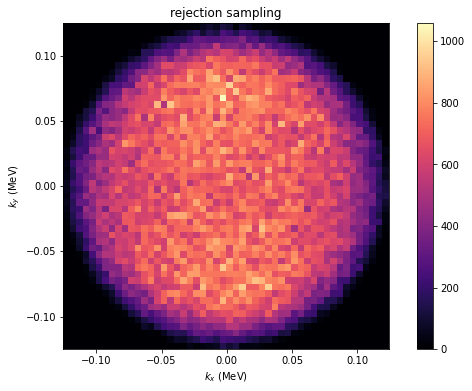

In [15]:
figure(figsize=(10,6))

subplot(111,aspect=1)
hist2d(K1/1e6,K2/1e6,bins=(50,50),weights=W,rasterized=True,cmap=cm.magma);
colorbar()
title(f'{sampling} sampling')

xlabel(r'$k_x$ (MeV)')
ylabel(r'$k_y$ (MeV)')


savefig(f'photon_transverse_momentum_{input_filename}.pdf')

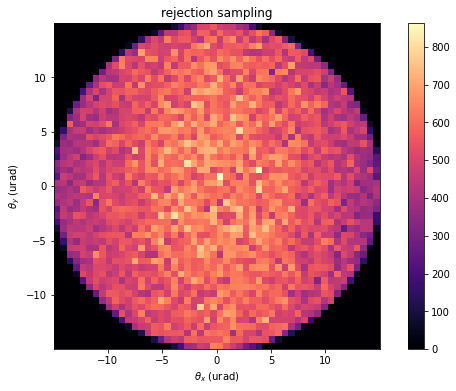

In [16]:
figure(figsize=(10,6))

subplot(111,aspect=1)
hist2d(K1/K3*1e6,K2/K3*1e6,bins=(50,50),weights=W,rasterized=True,cmap=cm.magma);
colorbar()
title(f'{sampling} sampling')

xlabel(r'$\theta_x$ (urad)')
ylabel(r'$\theta_y$ (urad)')


savefig(f'photon_transverse_angles_{input_filename}.pdf')

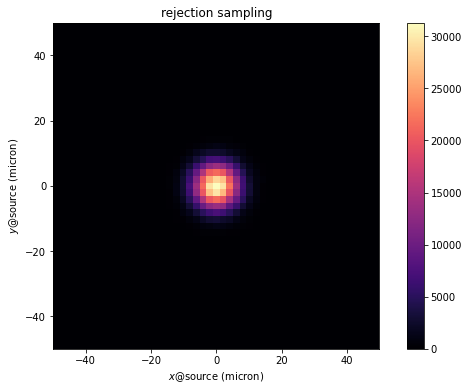

In [17]:
figure(figsize=(10,6))

bbins=(linspace(-2*w0,2*w0,50),linspace(-2*w0,2*w0,50))

subplot(111,aspect=1)
hist2d(X1,X2,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$x@$source (micron)')
ylabel(r'$y@$source (micron)')
title(f'{sampling} sampling')

xlim(-2*w0,2*w0)
ylim(-2*w0,2*w0)


savefig(f'photon_source_size_{input_filename}.pdf')


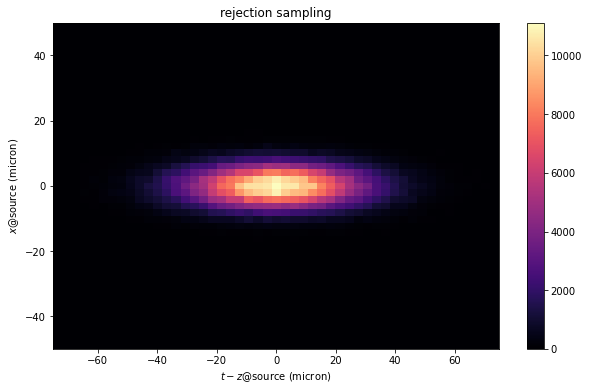

In [18]:
figure(figsize=(10,6))
bbins=(linspace(-75,75,50),linspace(-2*w0,2*w0,50))

subplot(111)
hist2d(X0-X3,X1,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$t-z@$source (micron)')
ylabel(r'$x@$source (micron)')
title(f'{sampling} sampling')



savefig(f'photon_source_length_{input_filename}.pdf')


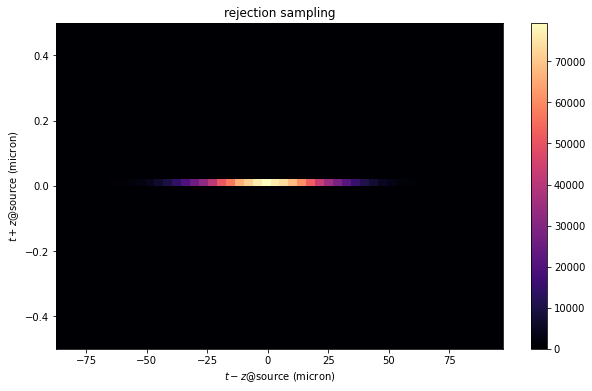

In [19]:
figure(figsize=(10,6))
bbins=(50,50)

subplot(111)
hist2d(X0-X3,X0+X3,bins=bbins,weights=W ,rasterized=True,cmap=cm.magma);
colorbar()

xlabel(r'$t-z@$source (micron)')
ylabel(r'$t+z@$source (micron)')
title(f'{sampling} sampling')



savefig(f'photon_source_lightfront_{input_filename}.pdf')


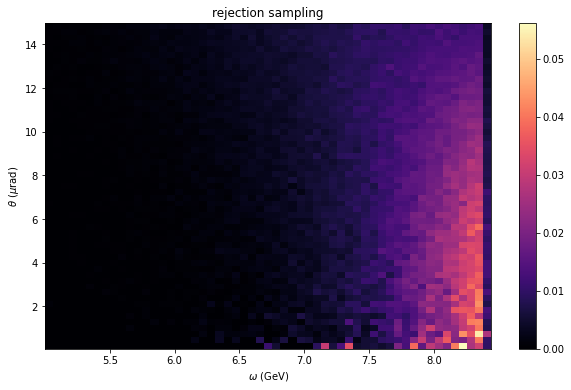

In [20]:
figure(figsize=(10,6))

bbins=(55,55)#(linspace(6,9,50),linspace(0,15,50))

subplot(111)
hist2d(K0/1e9,sqrt(K1**2+K2**2)/K3*1e6,bins=bbins,weights=W/sqrt(K1**2+K2**2),rasterized=True,cmap=cm.magma);
colorbar()
xlabel(r'$\omega$ (GeV)')
ylabel(r'$\theta$ ($\mu$rad)');
title(rf'{sampling} sampling')


savefig(f'photon_angular_spectrum_{input_filename}.pdf')


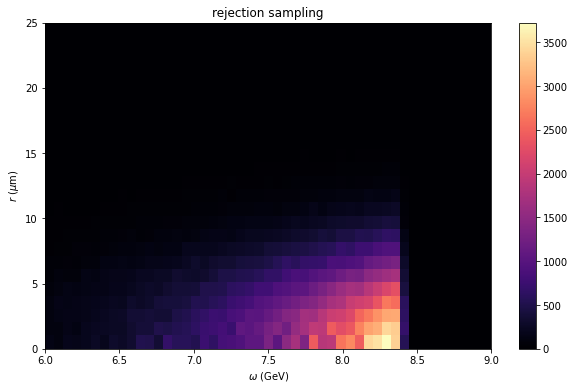

In [21]:
figure(figsize=(10,6))

bbins=(linspace(6,9,50),linspace(0,50,50))

subplot(111)
hist2d(K0/1e9,sqrt(X1**2+X2**2),bins=bbins,weights=W/sqrt(X1**2+X2**2),rasterized=True,cmap=cm.magma);
colorbar()
xlabel(r'$\omega$ (GeV)')
ylabel(r'$r$ ($\mu$m)');
title(rf'{sampling} sampling')
ylim(0,w0)

savefig(f'photon_transverse_spectrum_{input_filename}.pdf')


In [22]:
thetax=K1/K3
thetay=K2/K3

baseline = 7.5e6 

xoffset = thetax * baseline
yoffset = thetay * baseline

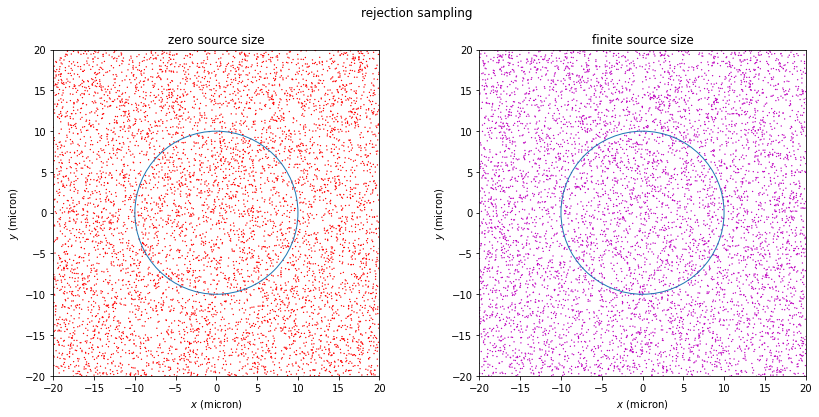

In [23]:
spotsize = 10 # micron


figure(figsize=(14,6))

ax1=subplot(121,aspect=1)
scatter(xoffset, yoffset, color='r',marker='.',lw=0,s=W);
xlim(-2*spotsize,2*spotsize)
ylim(-2*spotsize,2*spotsize)
xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('zero source size')


ax2=subplot(122,aspect=1)

# plot(X1+xoffset, X2+yoffset, color='m', marker=',',lw=0);
scatter(X1+xoffset, X2+yoffset, color='m', marker='.',lw=0,s=W);

xlim(-2*spotsize,2*spotsize)
ylim(-2*spotsize,2*spotsize)

xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('finite source size')

ax1.add_patch(Circle((0,0),spotsize,color='C0',fill=False))
ax2.add_patch(Circle((0,0),spotsize,color='C0',fill=False))


suptitle(f'{sampling} sampling')

savefig(f'photons_at_focus_{input_filename}.png',dpi=200)



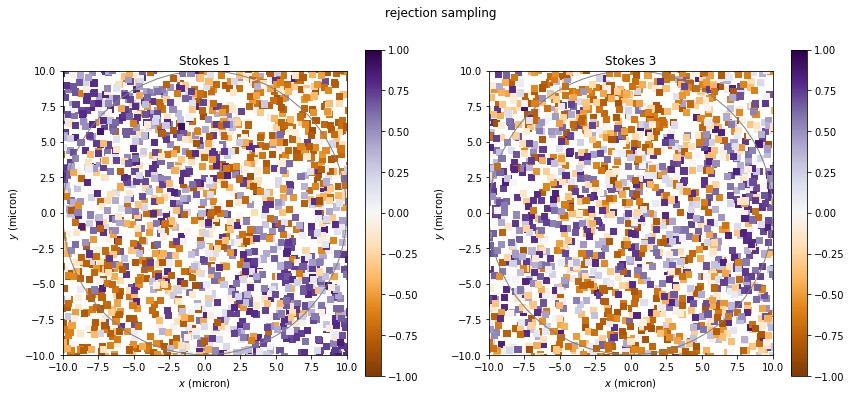

In [24]:
spotsize = 10 # micron


figure(figsize=(14,6))

ax1=subplot(121,aspect=1)
scatter(X1+xoffset, X2+yoffset, c=Stokes1, marker='s',lw=0,s=50,vmin=-1,vmax=1,cmap=cm.PuOr);
colorbar()
xlim(-spotsize,spotsize)
ylim(-spotsize,spotsize)
xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('Stokes 1')


ax2=subplot(122,aspect=1)

# plot(X1+xoffset, X2+yoffset, color='m', marker=',',lw=0);
scatter(X1+xoffset, X2+yoffset, c=Stokes3, marker='s',lw=0,s=50,vmin=-1,vmax=1,cmap=cm.PuOr);
colorbar()

xlim(-spotsize,spotsize)
ylim(-spotsize,spotsize)

xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('Stokes 3')

ax1.add_patch(Circle((0,0),spotsize,color='0.5',fill=False))
ax2.add_patch(Circle((0,0),spotsize,color='0.5',fill=False))


suptitle(f'{sampling} sampling')

savefig(f'photons_at_focus_StokesParameters_{input_filename}.png',dpi=200)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


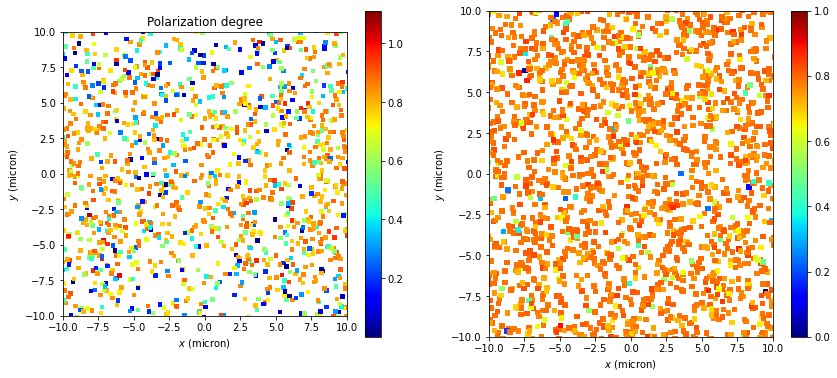

In [25]:
spotsize = 10 # micron


figure(figsize=(14,6))

ax1=subplot(121,aspect=1)
scatter(X1+xoffset, X2+yoffset, c=sqrt(Stokes1**2 + Stokes3)**2, marker='s',lw=0,s=20,cmap=cm.jet);
colorbar()
xlim(-spotsize,spotsize)
ylim(-spotsize,spotsize)
xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');
title('Polarization degree')


ax2=subplot(122)

# scatter(K0/1e9, 1e6*sqrt(K1**2 + K2**2)/K3, c=sqrt(Stokes1**2 + Stokes3)**2, marker='s',lw=0,s=20,cmap=cm.jet);
# colorbar()

phi = arctan2(K2,K1)
Stokes_rot3 = cos(2*phi) * Stokes3 - sin(2*phi) * Stokes1


scatter(X1+xoffset, X2+yoffset, c=Stokes_rot3, marker='s',s=20,vmin=0,vmax=1,cmap=cm.jet);
colorbar()
xlim(-spotsize,spotsize)
ylim(-spotsize,spotsize)
xlabel(r'$x$ (micron)')
ylabel(r'$y$ (micron)');


# xlim(-spotsize,spotsize)
# ylim(-spotsize,spotsize)

# xlabel(r'$\omega$ (GeV)')
# ylabel(r'$\theta$ (urad)');
# # title('Stokes 3')

# ax1.add_patch(Circle((0,0),spotsize,color='0.5',fill=False))
# # ax2.add_patch(Circle((0,0),spotsize,color='0.5',fill=False))


# suptitle(f'{sampling} sampling')

# savefig(f'PolarizationDegree_{input_filename}.png',dpi=200)



In [26]:
selector1 = sqrt(xoffset**2+yoffset**2) < spotsize
selector2 = sqrt((xoffset+X1)**2+(yoffset+X2)**2) < spotsize


print ( f'IP-laser spot size: {spotsize:.2f} micron')
print ( f'baseline          : {baseline/1e6:.2f} metres')
print ('-'*42)

print (f'photons in spot, {sampling} sampling:')
print (f'macrophoton weight               : {amax(W):.4g}')
print ( 'macrophotons, zero   source size :',sum( selector1 ) )
print ( 'macrophotons, finite source size :',sum( selector2 ) )
print ( 'photon weight, zero   source size:',sum(W[selector1 ] ) )
print ( 'photon weight, finite source size:',sum(W[selector2 ] ) )


IP-laser spot size: 10.00 micron
baseline          : 7.50 metres
------------------------------------------
photons in spot, rejection sampling:
macrophoton weight               : 7.543
macrophotons, zero   source size : 1343
macrophotons, finite source size : 1346
photon weight, zero   source size: 9819.808005723084
photon weight, finite source size: 9841.843716998503


### Photon Spectrum at IP

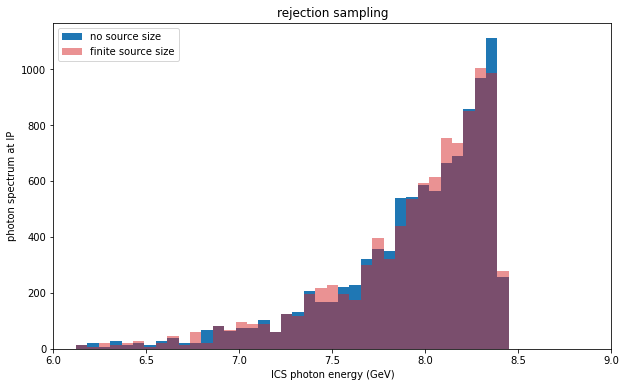

In [27]:
figure(figsize=(10,6))

subplot(111)
hist(K0[selector1]/1e9,bins=linspace(6,9,50),weights=W[selector1],alpha=1  ,fc='C0',label='no source size');
hist(K0[selector2]/1e9,bins=linspace(6,9,50),weights=W[selector2],alpha=0.5,fc='C3',label='finite source size'); 
xlim(6,9)
legend()
xlabel('ICS photon energy (GeV)')
ylabel('photon spectrum at IP')
title(rf'{sampling} sampling')

savefig(f'photon_spectrum_at_focus_{input_filename}.pdf')


### Photon Weight Distribution at IP

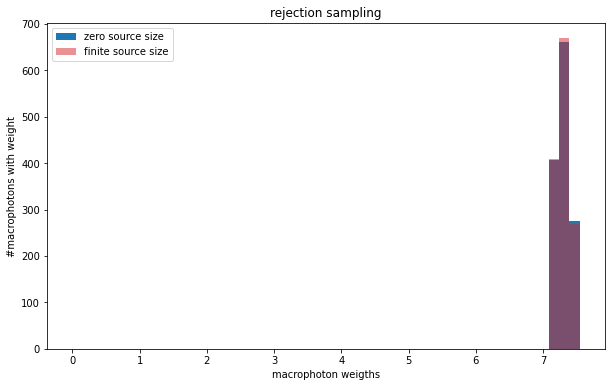

In [28]:
figure(figsize=(10,6))
base_weight = amax(W)
bbins = linspace(0,base_weight,50) 

hist( W[selector1],bins=bbins,label='zero source size'  ,fc='C0');
hist( W[selector2],bins=bbins,label='finite source size',fc='C3',alpha=0.5);


xlabel('macrophoton weigths')
ylabel('#macrophotons with weight')
title(rf'{sampling} sampling')
legend()
savefig(f'photon_weights_{input_filename}.pdf')


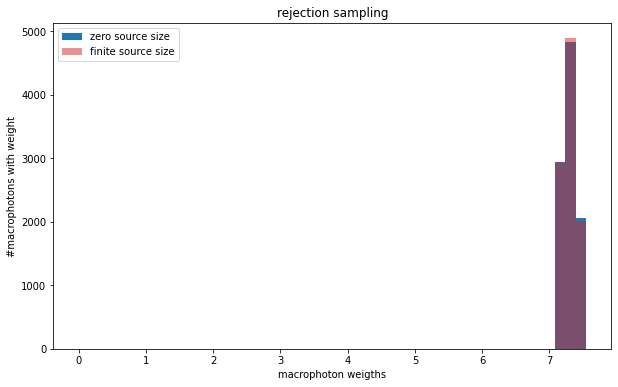

In [29]:
figure(figsize=(10,6))
base_weight = amax(W)
bbins = linspace(0,base_weight,50) 

hist( W[selector1],bins=bbins,weights=W[selector1],label='zero source size'  ,fc='C0',alpha=1.0);
hist( W[selector2],bins=bbins,weights=W[selector2],label='finite source size',fc='C3',alpha=0.5);

xlabel('macrophoton weigths')
ylabel('#macrophotons with weight')
title(rf'{sampling} sampling')
legend()
savefig(f'photon_weights2_{input_filename}.pdf')


### Electrons

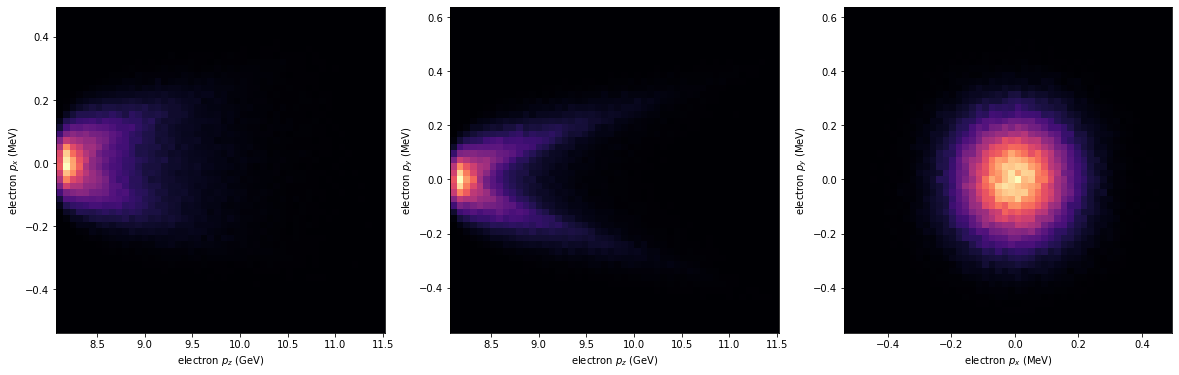

In [30]:
fig,ax=subplots(1,3,figsize=(20,6))
bbins=(50,50)

p0=ax[0].hist2d(P3/1e9,P1/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p0,ax=ax[0])

p1=ax[1].hist2d(P3/1e9,P2/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p1,ax=ax[1])

p2=ax[2].hist2d(P1/1e6,P2/1e6,bins=bbins,weights=W,rasterized=True,cmap=cm.magma);
# colorbar(p2,ax=ax[2])


ax[0].set_xlabel(r'electron $p_z$ (GeV)')
ax[1].set_xlabel(r'electron $p_z$ (GeV)')
ax[2].set_xlabel(r'electron $p_x$ (MeV)')

ax[0].set_ylabel(r'electron $p_x$ (MeV)')
ax[1].set_ylabel(r'electron $p_y$ (MeV)')
ax[2].set_ylabel(r'electron $p_y$ (MeV)')


savefig(f'electrons_final_momentum_{input_filename}.pdf')


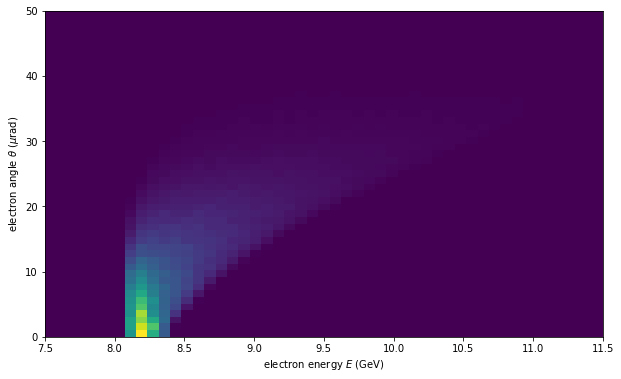

In [31]:
theta_ex = P1/P3
theta_ey = P2/P3
theta_e  = sqrt(theta_ex**2+theta_ey**2)

bbins=(linspace(7.5,11.5,50),linspace(0,50,50))

fig,ax=subplots(1,1,figsize=(10,6))

hist2d( P0/1e9 , theta_e*1e6 , bins=bbins , weights=W/theta_e );

xlabel(r'electron energy $E$ (GeV)')
ylabel(r'electron angle $\theta$ ($\mu$rad)');

savefig(f'electrons_final_energy_angle_{input_filename}.pdf')


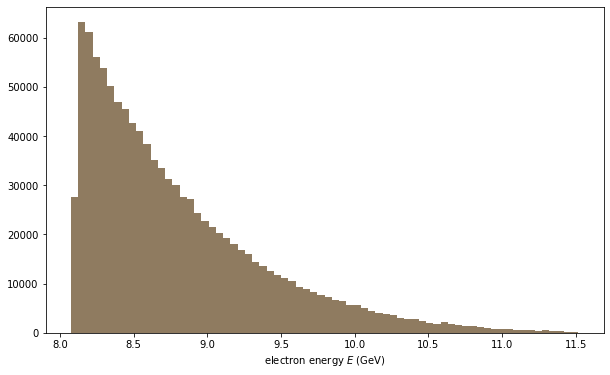

In [32]:
fig,ax=subplots(1,1,figsize=(10,6))
bbins=(50,50)

p0=ax.hist(P3/1e9,bins=70,weights=W);
p0=ax.hist(P0/1e9,bins=70,weights=W,alpha=0.5);
xlabel(r'electron energy $E$ (GeV)')

savefig(f'electrons_final_energy_{input_filename}.pdf')


Text(0, 0.5, 'initial electron beam $p_x$')

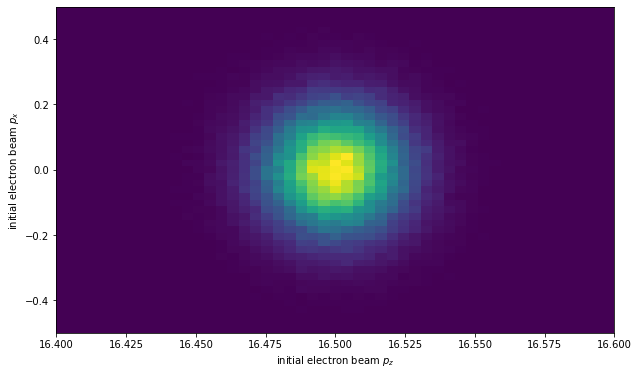

In [33]:
theta_ex = P1/P3
theta_ey = P2/P3
theta_e  = sqrt(theta_ex**2+theta_ey**2)

bbins=(linspace(16.4,16.6,50),linspace(-0.5,0.5,50))

fig,ax=subplots(1,1,figsize=(10,6))

hist2d( (P3+K3)/1e9 , (P1+K1)/1e6 , bins=bbins );
xlabel(r'initial electron beam $p_z$')
ylabel(r'initial electron beam $p_x$')




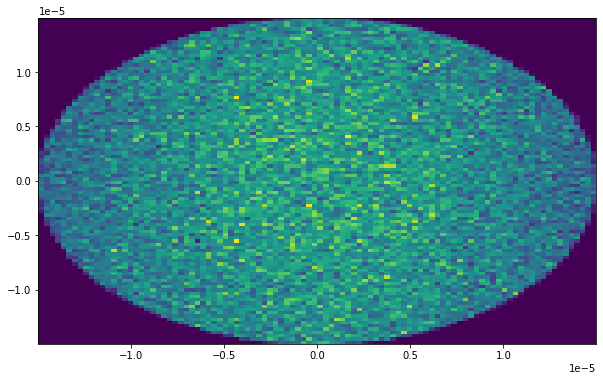

In [34]:
theta_x = K1/K3
theta_y = K2/K3
theta_e  = sqrt(theta_ex**2+theta_ey**2)

bbins=(100,100)#(linspace(16.4,16.6,50),linspace(-0.5,0.5,50))

fig,ax=subplots(1,1,figsize=(10,6))

hist2d( theta_x , theta_y , bins=bbins );



In [35]:
omega0 = 4.1
gamma0 = 32289.62818003914

omega = 2*gamma0*omega0
elec_mass = 511000.


omega1 = omega/(1+2*omega/elec_mass)